# Question 1:

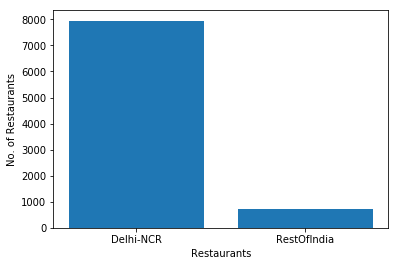

Restaurants in Delhi-NCR 7947
Restaurants in RestOfIndia 705


In [2]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#print(df.columns)
# replacing all data to relevent content
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)
series=df['city'].value_counts()
values=series.keys().tolist()
counts=series.tolist()
       
#Plotting the generated count with Bar Graph
x=values
y=counts
plt.xlabel("Restaurants")
plt.ylabel("No. of Restaurants")
plt.bar(x,y)
plt.show()
#Printing the generated count 
for i in range(len(x)):
    print("Restaurants in",x[i],y[i])

#### 2.Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [3]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from requests.auth import HTTPBasicAuth

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

# replacing all data to relevent content
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Creating dictionary city as key and value as cuisine
dict_city_cuisine={}
for i in range(df.shape[0]):
    key=df.iloc[i,3]
    value=df.iloc[i,9]
    if key in dict_city_cuisine:
        dict_city_cuisine[key]=dict_city_cuisine[key]+","+value
    else:
        dict_city_cuisine[key]=value

#Removing Duplicates
for i in dict_city_cuisine:
    lst=dict_city_cuisine[i].split(',')
    lst=[i.strip() for i in lst]
    s=set(lst)
    dict_city_cuisine[i]=list(s)

rest_l=dict_city_cuisine['RestOfIndia']
ncr_l=dict_city_cuisine['Delhi-NCR']

#Filtering the data according to Cuisines which are not present in Delhi NCR but are present in rest of the India
cuisine_list_csv=[]
print('Cuisines which are not present in Delhi NCR but are present in rest of the India')
for i in rest_l:
    if i not in ncr_l:
        print(i)
        cuisine_list_csv.append(i.strip())
        
#Part2 Verifying whether these cuisines actually don't exist
Complete_Cuisine_List=[]
para={"city_id":1}
header={"user-key":"01089ffa97fbc4375e4cf7abf3a5b54e"}
a=requests.get('https://developers.zomato.com/api/v2.1/cuisines',params=para,headers=header)
pyd=json.loads(a.text)
for i in pyd['cuisines']:
    Complete_Cuisine_List.append(i['cuisine']['cuisine_name'].strip())

print('Verifying whether above dishes are actually not present via API call')
for i in cuisine_list_csv:
    if i in Complete_Cuisine_List:
        print(i+" is present")

print('Conclusion - Based on the above inferences we can conclude that this result from csv is incorrect due to incomplete dataset')

Cuisines which are not present in Delhi NCR but are present in rest of the India
Malwani
German
Cajun
BBQ
Verifying whether above dishes are actually not present via API call
German is present
BBQ is present
Conclusion - Based on the above inferences we can conclude that this result from csv is incorrect due to incomplete dataset


#### 3.Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

RestOfIndia Top 10 Cuisines Vs No. of Restaurants
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


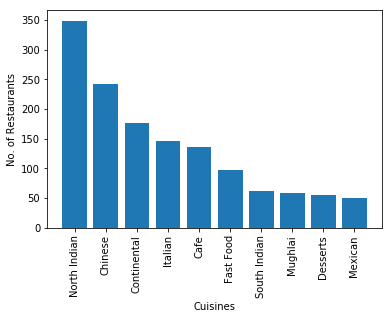

Delhi-NCR Top 10 Cuisines Vs No. of Restaurants
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


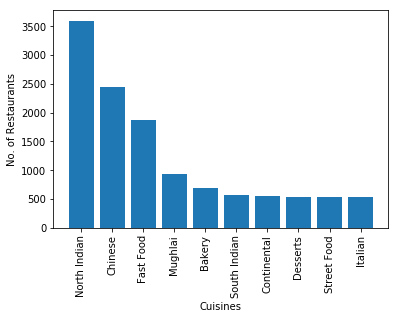

In [5]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

# replacing all data to relevent content
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#calculation for all cuisines
dict_cuisine={}        
for i in range(df.shape[0]):
    key=df.iloc[i,3]
    value=df.iloc[i,9]
    dict_cuisine[key]=dict_cuisine.get(key,'')+','+value
    
for i in dict_cuisine:
    lst=dict_cuisine[i].split(',')
    dict_cuisine[i]=[i.strip() for i in lst]

#Creating a dataFrame for ncr
temp_dict={}
for i in dict_cuisine:
    df1=pd.DataFrame(dict_cuisine[i])
    vc=df1[0].value_counts()
    keys=vc.keys().tolist()
    values=vc.tolist()
    print(i+' Top 10 Cuisines Vs No. of Restaurants')
    temp_dict[i+'top_10_x']=[]
    temp_dict[i+'top_10_y']=[]
    for j in range(10):
        print(keys[j],end=' ')
        temp_dict[i+'top_10_x'].append(keys[j])
        print(values[j])
        temp_dict[i+'top_10_y'].append(values[j])
    plt.xlabel("Cuisines")
    plt.ylabel("No. of Restaurants")
    plt.xticks(rotation=90)
    plt.bar(temp_dict[i+'top_10_x'],temp_dict[i+'top_10_y'])
    plt.show()

#### 4.Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Cuisines present in NCR but not present in rest of the india
Iranian
Sri Lankan
Persian
Afghani
Naga
Sushi
South American
Bihari
Raw Meats
Oriya
Nepalese
Turkish
Pakistani
Kashmiri
Drinks Only
Cuisine Varies
Moroccan
Deli
Belgian
Assamese

Cuisines present in Rest of the India but not present in NCR
Malwani
German
Cajun
BBQ

Also from Que1-Part3 above, common cuisines among both region from the set of top 10 cuisines of both region along with there share are-
NCR Region


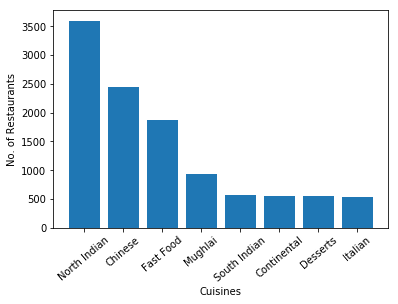


Non NCR Region


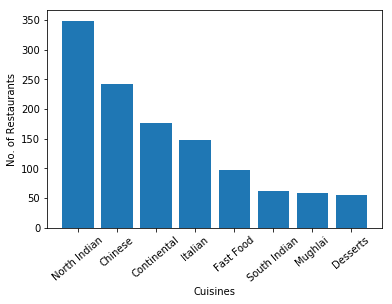

In [6]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

# replacing all data to relevent content
df['city'].replace('New Delhi','Delhi-NCR',inplace=True)
df['city'].replace('Ghaziabad','Delhi-NCR',inplace=True)
df['city'].replace('Noida','Delhi-NCR',inplace=True)
df['city'].replace('Gurgaon','Delhi-NCR',inplace=True)
df['city'].replace('Faridabad','Delhi-NCR',inplace=True)
def update_city(city):
    if city!='Delhi-NCR':
        return 'RestOfIndia'
    else:
        return 'Delhi-NCR'
df['city'] = df['city'].apply(update_city)

#Creating Dictionary for Cuisines Served in India
d={}
for i in range(df.shape[0]):
    key=df.iloc[i,3]
    value=df.iloc[i,9]
    if key in d:
        d[key]=d[key]+","+value
    else:
        d[key]=value
#Creating a list out of d and removing duplicates
for i in d:
    l=[]
    x=d[i].split(",")
    l=[j.strip() for j in x]
    d[i]=list(set(l))
ncr_cuisine_list=d['Delhi-NCR']
non_ncr_cuisine_list=d['RestOfIndia']
print('Cuisines present in NCR but not present in rest of the india')
for i in ncr_cuisine_list:
    if i not in non_ncr_cuisine_list:
        print(i)
print()
print('Cuisines present in Rest of the India but not present in NCR')
for i in non_ncr_cuisine_list:
    if i not in ncr_cuisine_list:
        print(i)
print()
print('Also from Que1-Part3 above, common cuisines among both region from the set of top 10 cuisines of both region along with there share are-')
x1=[]
x2=[]
y1=[]
y2=[]
ncr_top_10_x=temp_dict['Delhi-NCR'+'top_10_x']
ncr_top_10_y=temp_dict['Delhi-NCR'+'top_10_y']
non_ncr_top_10_x=temp_dict['RestOfIndia'+'top_10_x']
non_ncr_top_10_y=temp_dict['RestOfIndia'+'top_10_y']
for i in range(len(ncr_top_10_x)):
    if ncr_top_10_x[i] in non_ncr_top_10_x:
        x1.append(ncr_top_10_x[i])
        y1.append(ncr_top_10_y[i])
print('NCR Region')
plt.xticks(rotation=40)
plt.bar(x1,y1)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.show()
print()
for i in range(len(non_ncr_top_10_x)):
    if non_ncr_top_10_x[i] in ncr_top_10_x:
        x2.append(non_ncr_top_10_x[i])
        y2.append(non_ncr_top_10_y[i])
print('Non NCR Region')
plt.xticks(rotation=40)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.bar(x2,y2)
plt.show()


## Question 2

#### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
##### i.Number of Votes given Restaurant

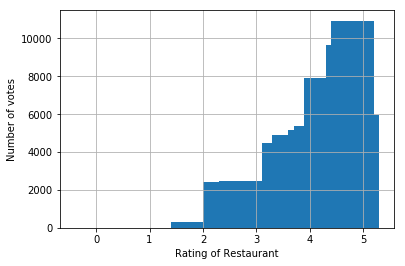

Conclusion- As we can see the rating getting increased with votes, we can conclude that both entities are directly proportional


In [7]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating x and y list for plotting
x=[]
y=[]
for i in range(df.shape[0]):
    x.append(df.iloc[i,17])
    y.append(df.iloc[i,20])
#Plotting bar graph
plt.bar(x,y)
plt.grid()
plt.xlabel("Rating of Restaurant")
plt.ylabel("Number of votes")
plt.show()
print('Conclusion- As we can see the rating getting increased with votes, we can conclude that both entities are directly proportional')

#### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
##### ii.Restaurant serving more number of cuisines.

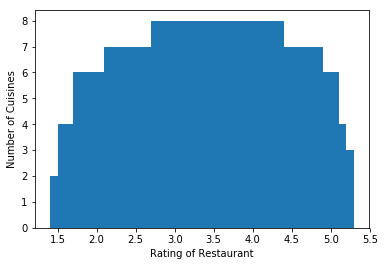

Conclusion- As we can see that highest rated restaurants have less number of cuisines in comparison to resturants having more cuisines, we can conclude that rating is somewhat inversely proportional here with number of cuisines


In [8]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating list for plotting
x=[]
y=[]
for i in range(df.shape[0]):
    if df.iloc[i,17]!=0:
        s=str(df.iloc[i,9])
        y.append(len(s.split(",")))
        x.append(df.iloc[i,17])
plt.bar(x,y)
plt.xlabel("Rating of Restaurant")
plt.ylabel("Number of Cuisines")
plt.show()
print('Conclusion- As we can see that highest rated restaurants have less number of cuisines in comparison to resturants having more cuisines, we can conclude that rating is somewhat inversely proportional here with number of cuisines')

#### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
##### iii.Average Cost of Restaurant

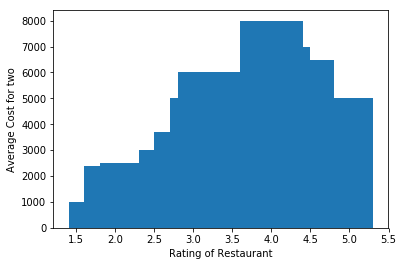

Inference- Highest rated restaurants have less average cost in comparison to resturants having more average cost


In [27]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Plotting with x,y list
x=[]
y=[]
for i in range(df.shape[0]):
    if df.iloc[i,17]!=0:
        y.append(df.iloc[i,10])
        x.append(df.iloc[i,17])
plt.bar(x,y)
plt.xlabel("Rating of Restaurant")
plt.ylabel("Average Cost for two")
plt.show()
print('Inference- Highest rated restaurants have less average cost in comparison to resturants having more average cost')


#### 1.Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
##### iv.Restaurant serving some specific cuisines.

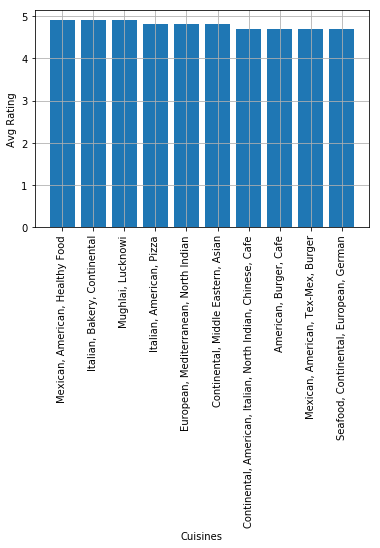



Conclusion- We can infer that serving above dishes leads to highest rating for resturants


In [13]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Creating dictionary for cuisines vs Rating of restuarant serving the same
d={}
for i in range(df.shape[0]):
    key=df.iloc[i,9]
    value=df.iloc[i,17]
    if key in d:
        d[key]=str(d[key])+","+str(value)
    else:
        d[key]=str(value)
def Average(lst):
    return round(sum(lst) / len(lst),2)
#Finding average rating of each restaurant for cuisines in dictionary
for i in d:
    l=d[i].split(",")
    for j in range(len(l)):
        l[j]=l[j].strip()
        k=[]
        for x in l:
            k.append(float(x))
        d[i]=Average(k)
#Finding Top 10 Cuisines with maximum average rating of restaurants serving them
#Sorting the final dictionary in reverse order and fetching 10 records
x1=[]
y1=[]
for key, value in sorted(d.items(), key=lambda item: item[1],reverse=True)[:10]:
    x1.append(key)
    y1.append(value)
plt.bar(x1,y1)
plt.xlabel("Cuisines")
plt.ylabel("Avg Rating")
plt.grid()
plt.xticks(rotation=90)
plt.show()
print()
print()
print('Conclusion- We can infer that serving above dishes leads to highest rating for resturants')

#### 2.Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?#### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

Top 10 localities with weighted rating in India
Hotel Clarks Amer, Malviya Nagar  :  4.90
Aminabad  :  4.90
Friends Colony  :  4.89
Powai  :  4.84
Kirlampudi Layout  :  4.82
Express Avenue Mall,  Royapettah  :  4.80
Deccan Gymkhana  :  4.80
Banjara Hills  :  4.72
Sector 5, Salt Lake  :  4.71
Riverside Mall, Gomti Nagar  :  4.70


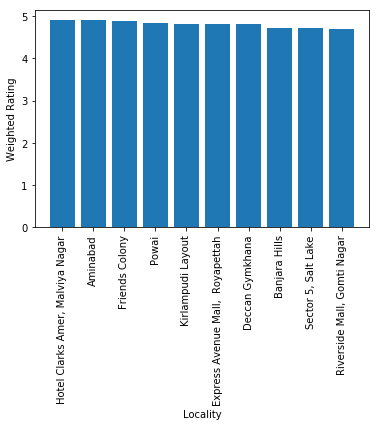

In [11]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Dictionary1 - Locality vs Ratings of restaurant
d1={}
for i in range(df.shape[0]):
    l=[df.iloc[i,17]]
    key=df.iloc[i,5]
    value=l
    if key in d1:
        d1[key]=d1[key]+value
    else:
        d1[key]=value
#Dictionary2- Locality vs Votes of restaurant
d2={}
for i in range(df.shape[0]):
    l=[df.iloc[i,20]]
    key=df.iloc[i,5]
    value=(l)
    if key in d2:
        d2[key]=d2[key]+value
    else:
        d2[key]=value
#Weighted Rating calculation and making dictionary of Locality to Weighted Rating
for i in d1:
    key=i
    vr=0
    tv=0
    for j in range(len(d1[key])):
        vr=vr+d1[key][j]*d2[key][j]
        tv=tv+d2[key][j]
        if(tv!=0):
            wr=vr/tv
        else:
            wr=0
    d2[key]=wr
#Sorting the final dictionary in reverse order and fetching 10 records
x=[]
y=[]
print('Top 10 localities with weighted rating in India')
for key, value in sorted(d2.items(), key=lambda item: item[1],reverse=True)[:10]:
    print(key," : ",format(value,'.2f'))
    x.append(key)
    y.append(value)
plt.bar(x,y)
plt.xlabel("Locality")
plt.ylabel("Weighted Rating")
plt.xticks(rotation=90)
plt.show()


## Question 3
#### 1.Plot the bar graph top 15 restaurants have a maximum number of outlets.

Top 15 restaurants in India with respect to number of outlets
Cafe Coffee Day 83
Domino's Pizza 79
Subway 63
Green Chick Chop 51
McDonald's 48
Keventers 34
Pizza Hut 29
Giani 29
Baskin Robbins 28
Barbeque Nation 25
Barista 22
Giani's 22
Dunkin' Donuts 22
Costa Coffee 20
Pind Balluchi 20


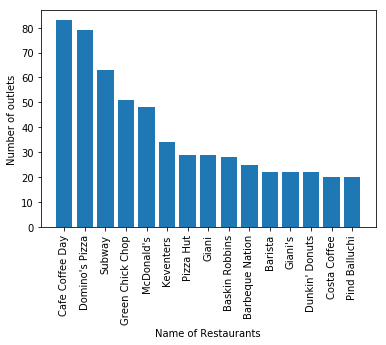

In [15]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Getting value Counts
vc=df.restaurant_name.value_counts()
keys=vc.keys().tolist()
values=vc.tolist()
print('Top 15 restaurants in India with respect to number of outlets')
#Making blank lists for plotting
x=[]
y=[]
for i in range(15):
    x.append(keys[i])
    y.append(values[i])
    print(keys[i],values[i])
#Plotting the bar graph
plt.xlabel("Name of Restaurants")
plt.ylabel("Number of outlets")
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


#### 2.Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

Aggregate rating of restuarants in India without considering unrated restaurants


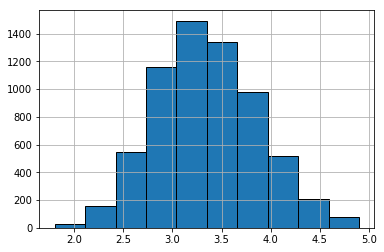

In [16]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

print('Aggregate rating of restuarants in India without considering unrated restaurants')
x=[]
for i in range(df.shape[0]):
    if df.iloc[i,17]!=0:
        x.append(df.iloc[i,17])
plt.grid()
plt.hist(x,edgecolor='black')
plt.show()

#### 3.Plot the bar graph top 10 restaurants in the data with the highest number of votes.

Top 10 Restaurants in India with maximum number of votes


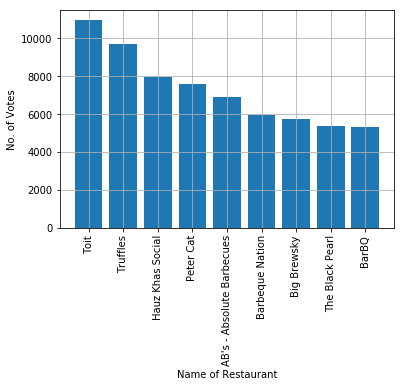

51705 Toit 10934
51040 Truffles 9667
308322 Hauz Khas Social 7931
20404 Peter Cat 7574
56618 AB's - Absolute Barbecues 6907
20842 Barbeque Nation 5966
58882 Big Brewsky 5705
94286 AB's - Absolute Barbecues 5434
54162 The Black Pearl 5385
20870 BarBQ 5288


In [17]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Making dictionary of keys as Restaurant Name and values as Number of votes
d={}
for i in range(df.shape[0]):
    key=df.iloc[i,0]
    value=df.iloc[i,20]
    if key in d:
        d[key]=d[key]+value
    else:
        d[key]=value
#Sorting the dictionary in reverse order and fetching 10 records
counter=0
x=[]
y=[]
for key, value in sorted(d.items(), key=lambda item: item[1],reverse=True):
    counter=counter+1
    x.append(key)
    y.append(value)
    if counter==10:
        break
print('Top 10 Restaurants in India with maximum number of votes')
z=[]
for j in x:
    for i in range(df.shape[0]):
        if df.iloc[i,0]==j:
            z.append(df.iloc[i,1])
plt.xticks(rotation=90)
plt.bar(z,y)
plt.grid()
plt.xlabel("Name of Restaurant")
plt.ylabel("No. of Votes")
plt.show()
for i in range(len(z)):
    print(x[i],z[i],y[i])

#### 4.Plot the pie graph of top 10 cuisines present in restaurants in the USA.

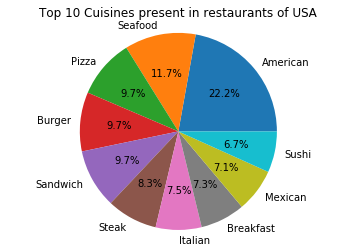

American 112
Seafood 59
Pizza 49
Burger 49
Sandwich 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


In [18]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code as USA
df=df[(df.country_code==216)]
vc=df.cuisines
vc.fillna('None',inplace=True)
cuisines=[]
for i in vc:
    if ',' in i:
        l=i.split(",")
        for k in l:
            cuisines.append(k.strip())
    elif 'None' in i:
        continue
    else:
        cuisines.append(i.strip())
        
        
#Making data frame for USA Cuisines
df2=pd.DataFrame(cuisines)
vc=df2[0].value_counts()
keys=vc.keys().tolist()
values=vc.tolist()
labels=[]
sizes=[]
for i in range(10):
    labels.append(keys[i])
    sizes.append(values[i])
plt.title("Top 10 Cuisines present in restaurants of USA")
plt.pie(sizes,labels=labels,autopct="%.1f%%")
plt.axis("equal")
plt.show()
for i in range(len(labels)):
    print(labels[i],sizes[i])


#### 5.Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

Bubble graph of number of Restaurants present in the cities of India and keeping the weighted restaurant rating of the city in a bubble.


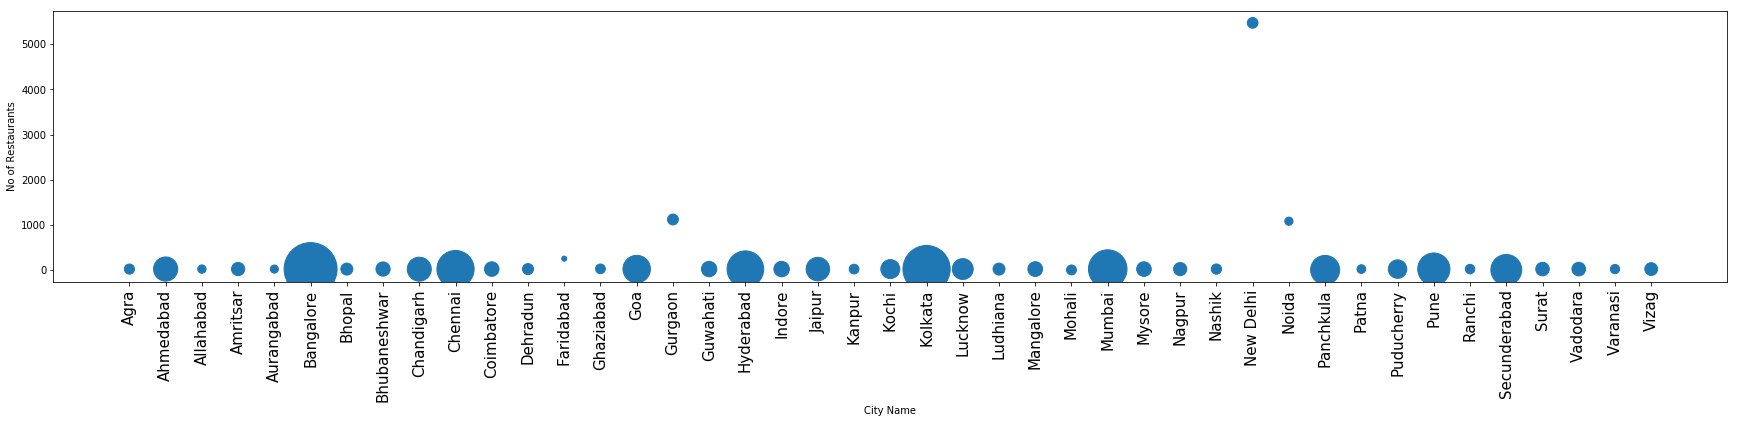

In [26]:
#Importing all relevant header files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Reading the csv data
data=pd.read_csv("zomato.csv",encoding ="ISO-8859-1")
#Making a copy of the extracted data 
df=data.copy()
#Fixing Column Names with spaces
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#Applying country code India
df=df[(df.country_code==1)]

#Dictionary1 - City vs Ratings of restaurant
d1={}
for i in range(df.shape[0]):
    l=[df.iloc[i,17]]
    key=df.iloc[i,3]
    value=l
    if key in d1:
        d1[key]=d1[key]+value
    else:
        d1[key]=value
#Dictionary2- City vs Votes of restaurant
d2={}
for i in range(df.shape[0]):
    l=[df.iloc[i,20]]
    key=df.iloc[i,3]
    value=l
    if key in d2:
        d2[key]=d2[key]+value
    else:
        d2[key]=value
#Weighted Rating calculation and making dictionary(d2) of City to Weighted Rating
for i in d1:
    key=i
    vr=0
    tv=0
    for j in range(len(d1[key])):
        vr=vr+d1[key][j]*d2[key][j]
        tv=tv+d2[key][j]
    if(tv!=0):
        wr=vr/tv
    else:
        wr=0
        d2[key]=wr
#Now getting number of resturants in a City(d3)
d3={}
for i in range(df.shape[0]):
    key=df.iloc[i,3]
    if key in d3:
        d3[key]=d3[key]+1
    else:
        d3[key]=1
x=[] #CityName
y=[] #Number Of resturants
z=[] #Weighted Rating
#Now d2 has data of City VS Weighted Rating and d3 has data of City Vs Number of Restaurants
counter=0
for i in d2:
    for j in d3:
        if(i==j):
            counter=counter+1
            x.append(i)
            y.append(d3[j])
            z.append(d2[i])
print('Bubble graph of number of Restaurants present in the cities of India and keeping the weighted restaurant rating of the city in a bubble.')
y=np.array(y)
z=np.array(z)
plt.figure(figsize=(30,5))
plt.xticks(fontsize=15,rotation=90)
plt.xlabel("City Name")
plt.ylabel("No of Restaurants")
p=[]
for i in z:
    p.append(round(sum(i)/len(i)))
plt.scatter(x,y,s=p)
plt.show()
